# Calculate OV values

In [24]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Descriptors import ExactMolWt
import numpy as np
import json

In [25]:
extra_df = pd.read_csv("extra_data.csv")
extra_df = extra_df[list(extra_df.keys()[1:])]
extra_df.head()

,logP_value,legacy_url,water_sol_from_logP,water_sol_from_structure,water_sol_experimental
0,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.07100,3.48340,2.49
1,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.58100,3.48340,NaN
2,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.21000,4.62600,NaN
3,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.04863,0.80763,NaN
4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.27500,2.61920,4.60


In [26]:
df_fetched = pd.read_csv("scaped_vp.csv")
df_fetched = df_fetched[["fetched_name","vapour_pressure","url","vapour_pressure2"]]
df_fetched.head()

,fetched_name,vapour_pressure,url,vapour_pressure2
0,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5
1,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9
2,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0
3,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0
4,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4


In [27]:
df_pine = pd.read_csv("src/smiles_pine.csv")[["name","cas","composition"]]
df_pine.head()

,name,cas,composition
0,alpha-Pinene,80-56-8,0.281
1,delta-3-Carene,13466-78-9,0.237
2,Caryophyllene oxide,1139-30-6,0.049
3,delta-Cadinene,483-76-1,0.048
4,Camphene,79-92-5,0.034


In [28]:
smiles_df = pd.read_csv("src/activity_coeff.csv")[["smiles","basic_smiles","activity_coeff"]]
smiles_df.head()

,smiles,basic_smiles,activity_coeff
0,CC1=CCC2CC1C2(C)C,CC1=CCC2CC1C2(C)C,1.019800
1,CC1=CCC2C(C1)C2(C)C,CC1=CCC2C(C1)C2(C)C,1.019800
2,C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2,C=C1CCC2OC2(C)CCC2C1CC2(C)C,0.921445
3,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C,CC1=CC2C(=C(C)CCC2C(C)C)CC1,1.041275
4,CC1(C2CCC(C2)C1=C)C,C=C1C2CCC(C2)C1(C)C,1.015911


In [29]:
df = pd.concat([df_pine,df_fetched,extra_df, smiles_df], axis=1)
df.head()

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,water_sol_from_structure,water_sol_experimental,smiles,basic_smiles,activity_coeff
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.07100,3.48340,2.49,CC1=CCC2CC1C2(C)C,CC1=CCC2CC1C2(C)C,1.019800
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.58100,3.48340,NaN,CC1=CCC2C(C1)C2(C)C,CC1=CCC2C(C1)C2(C)C,1.019800
2,Caryophyllene oxide,1139-30-6,0.049,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.21000,4.62600,NaN,C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2,C=C1CCC2OC2(C)CCC2C1CC2(C)C,0.921445
3,delta-Cadinene,483-76-1,0.048,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.04863,0.80763,NaN,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C,CC1=CC2C(=C(C)CCC2C(C)C)CC1,1.041275
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.27500,2.61920,4.60,CC1(C2CCC(C2)C1=C)C,C=C1C2CCC(C2)C1(C)C,1.015911


In [30]:
molar_weight = []
for smiles in df["smiles"]:
    molar_weight.append(ExactMolWt(Chem.MolFromSmiles(smiles)))


In [31]:
df["molar_weight"]=molar_weight

In [32]:
df.head()

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,water_sol_from_structure,water_sol_experimental,smiles,basic_smiles,activity_coeff,molar_weight
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.07100,3.48340,2.49,CC1=CCC2CC1C2(C)C,CC1=CCC2CC1C2(C)C,1.019800,136.125201
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.58100,3.48340,NaN,CC1=CCC2C(C1)C2(C)C,CC1=CCC2C(C1)C2(C)C,1.019800,136.125201
2,Caryophyllene oxide,1139-30-6,0.049,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.21000,4.62600,NaN,C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2,C=C1CCC2OC2(C)CCC2C1CC2(C)C,0.921445,220.182715
3,delta-Cadinene,483-76-1,0.048,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.04863,0.80763,NaN,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C,CC1=CC2C(=C(C)CCC2C(C)C)CC1,1.041275,204.187801
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.27500,2.61920,4.60,CC1(C2CCC(C2)C1=C)C,C=C1C2CCC(C2)C1(C)C,1.015911,136.125201


In [33]:
def odt(psat, kow, cw, M, T=298, R=8.314):
    """
    Calculate the odor detection threshold.
    p_sat   [Pa]
    kow     [-]
    cw      [mg/L] or [g/m^3]
    M       [g/mol]
    T       [K]
    R       [J/(mol K)]
    """
    return 10**( 0.97 * np.log10(psat*M/(kow*cw*R*T))+4.2)

In [34]:
# mmHg to Pa
df["psat [Pa]"] = df["vapour_pressure2"]*133.322

In [35]:
# logP to Kow
df["kow [-]"] = 10**df["logP_value"]

In [36]:
df["cw [mg/L]"] = df["water_sol_from_logP"]

In [37]:
df["M [g/mol]"] = df["molar_weight"]

In [38]:
df["y [-]"] = df["activity_coeff"]

In [39]:
df["x [-]"] = df["composition"]

In [40]:
for i,cw in enumerate(df["cw [mg/L]"] ):

    if df["kow [-]"][i]==0:
        print(f"kow {i}")
    if cw==0:
        print(f"cw {i}")

In [41]:
df["ODT [mg/m^3]"]=odt(df["psat [Pa]"], df["kow [-]"], df["cw [mg/L]"], df["M [g/mol]"], T=298, R=8.314)
df.head()

d:\Dokumenter\Skole\Prosjektoppgave\odor-intensity-calculations\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,basic_smiles,activity_coeff,molar_weight,psat [Pa],kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3]
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.07100,...,CC1=CCC2CC1C2(C)C,1.019800,136.125201,466.6270,2.344229e+04,4.07100,136.125201,1.019800,0.281,5.448859
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.58100,...,CC1=CCC2C(C1)C2(C)C,1.019800,136.125201,253.3118,2.344229e+04,4.58100,136.125201,1.019800,0.237,2.686762
2,Caryophyllene oxide,1139-30-6,0.049,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.21000,...,C=C1CCC2OC2(C)CCC2C1CC2(C)C,0.921445,220.182715,0.0000,3.715352e+04,2.21000,220.182715,0.921445,0.049,0.000000
3,delta-Cadinene,483-76-1,0.048,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.04863,...,CC1=CC2C(=C(C)CCC2C(C)C)CC1,1.041275,204.187801,0.0000,3.467369e+06,0.04863,204.187801,1.041275,0.048,0.000000
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.27500,...,C=C1C2CCC(C2)C1(C)C,1.015911,136.125201,453.2948,2.344229e+04,6.27500,136.125201,1.015911,0.034,3.481921


In [42]:
def c_gi(x,y,psat,M,R=8.314,T=298):
    """ 
    x       [-]
    y       [-]
    psat    [Pa]
    M       [g/mol]
    R       [J/molK]
    T       [K]

    return OV [g/m^3]
    """
    return (x*y*psat*M)/(R*T)

In [43]:
df["Cgi [mg/m^3]"] = c_gi(df["x [-]"],df["y [-]"],df["psat [Pa]"],df["M [g/mol]"])*1000
df.head()

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,activity_coeff,molar_weight,psat [Pa],kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3],Cgi [mg/m^3]
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.07100,...,1.019800,136.125201,466.6270,2.344229e+04,4.07100,136.125201,1.019800,0.281,5.448859,7346.889389
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.58100,...,1.019800,136.125201,253.3118,2.344229e+04,4.58100,136.125201,1.019800,0.237,2.686762,3363.807109
2,Caryophyllene oxide,1139-30-6,0.049,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.21000,...,0.921445,220.182715,0.0000,3.715352e+04,2.21000,220.182715,0.921445,0.049,0.000000,0.000000
3,delta-Cadinene,483-76-1,0.048,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.04863,...,1.041275,204.187801,0.0000,3.467369e+06,0.04863,204.187801,1.041275,0.048,0.000000,0.000000
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.27500,...,1.015911,136.125201,453.2948,2.344229e+04,6.27500,136.125201,1.015911,0.034,3.481921,860.255616


In [44]:
df["OV [-]"] = df["Cgi [mg/m^3]"]/df["ODT [mg/m^3]"]

<Axes: >

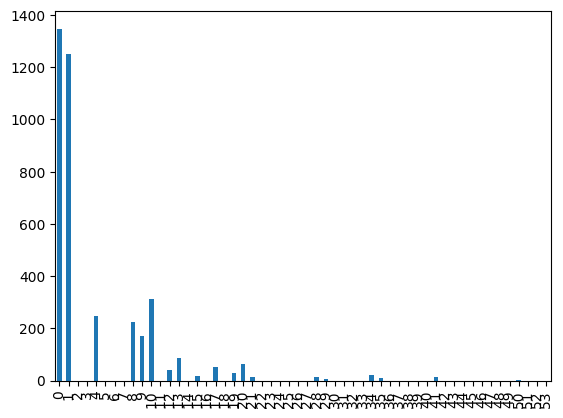

In [45]:
df["OV [-]"].plot.bar()

In [46]:
top_5 = df.nlargest(5, 'OV [-]')
top_5

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,molar_weight,psat [Pa],kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3],Cgi [mg/m^3],OV [-]
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.071,...,136.125201,466.6270,23442.288153,4.071,136.125201,1.019800,0.281,5.448859,7346.889389,1348.335352
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.581,...,136.125201,253.3118,23442.288153,4.581,136.125201,1.019800,0.237,2.686762,3363.807109,1251.993079
10,Myrcene,123-35-3,0.021,β-Myrcene,2.3±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,2.3,4.58,https://legacy.chemspider.com/Chemical-Structu...,6.923,...,136.125201,306.6406,38018.939632,6.923,136.125201,1.201470,0.021,1.355377,425.083406,313.627406
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.275,...,136.125201,453.2948,23442.288153,6.275,136.125201,1.015911,0.034,3.481921,860.255616,247.063528
8,Terpinolene,586-62-9,0.026,TERPINOLENE,1.1±0.2 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.1,4.67,https://legacy.chemspider.com/Chemical-Structu...,3.838,...,136.125201,146.6542,46773.514129,3.838,136.125201,1.028665,0.026,0.960591,215.503397,224.344482


In [47]:

# Convert and write JSON object to file
with open("opt_teory.json", "r") as outfile: 
    theory_dict = json.load(outfile)

# Convert and write JSON object to file
with open("opt_teory_list.json", "r") as outfile: 
    theory_list = json.load(outfile)

theory_dict,theory_list

({'0': [0.295, 105.0, 0.1],
  '1': [9.3],
  '2': [],
  '3': [],
  '4': [],
  '5': [],
  '6': [],
  '7': [],
  '8': [],
  '9': [8.9, 65.0, 0.18],
  '10': [],
  '11': [],
  '12': [0.44],
  '13': [],
  '14': [],
  '15': [],
  '16': [],
  '17': [1.7, 0.21],
  '18': [],
  '19': [],
  '20': [0.1275, 0.19, 0.003, 0.069, 0.026, 0.04, 2.0],
  '21': [],
  '22': [],
  '23': [],
  '24': [],
  '25': [],
  '26': [0.052],
  '27': [],
  '28': [2.5, 55.0],
  '29': [],
  '30': [],
  '31': [],
  '32': [],
  '33': [],
  '34': [7.9],
  '35': [],
  '36': [],
  '37': [],
  '38': [],
  '39': [],
  '40': [0.19, 0.39, 0.01, 0.86],
  '41': [7.2],
  '42': [],
  '43': [],
  '44': [],
  '45': [],
  '46': [],
  '47': [1.54],
  '48': [0.00071, 0.6],
  '49': [],
  '50': [5.0, 1.008, 0.06, 9.5, 0.49],
  '51': [],
  '52': [],
  '53': []},
 [0.295,
  9.3,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  8.9,
  nan,
  nan,
  0.44,
  nan,
  nan,
  nan,
  nan,
  0.955,
  nan,
  nan,
  0.069,
  nan,
  nan,
  nan,
  nan,
  

In [48]:
df["ODT (theory) [mg/m^3]"] = theory_list

In [49]:
df["OV (theory) [-]"] =  df["Cgi [mg/m^3]"]/df["ODT (theory) [mg/m^3]"]

In [50]:
import matplotlib.pyplot as plt

<Axes: xlabel='name', ylabel='OV [g/m^3]'>

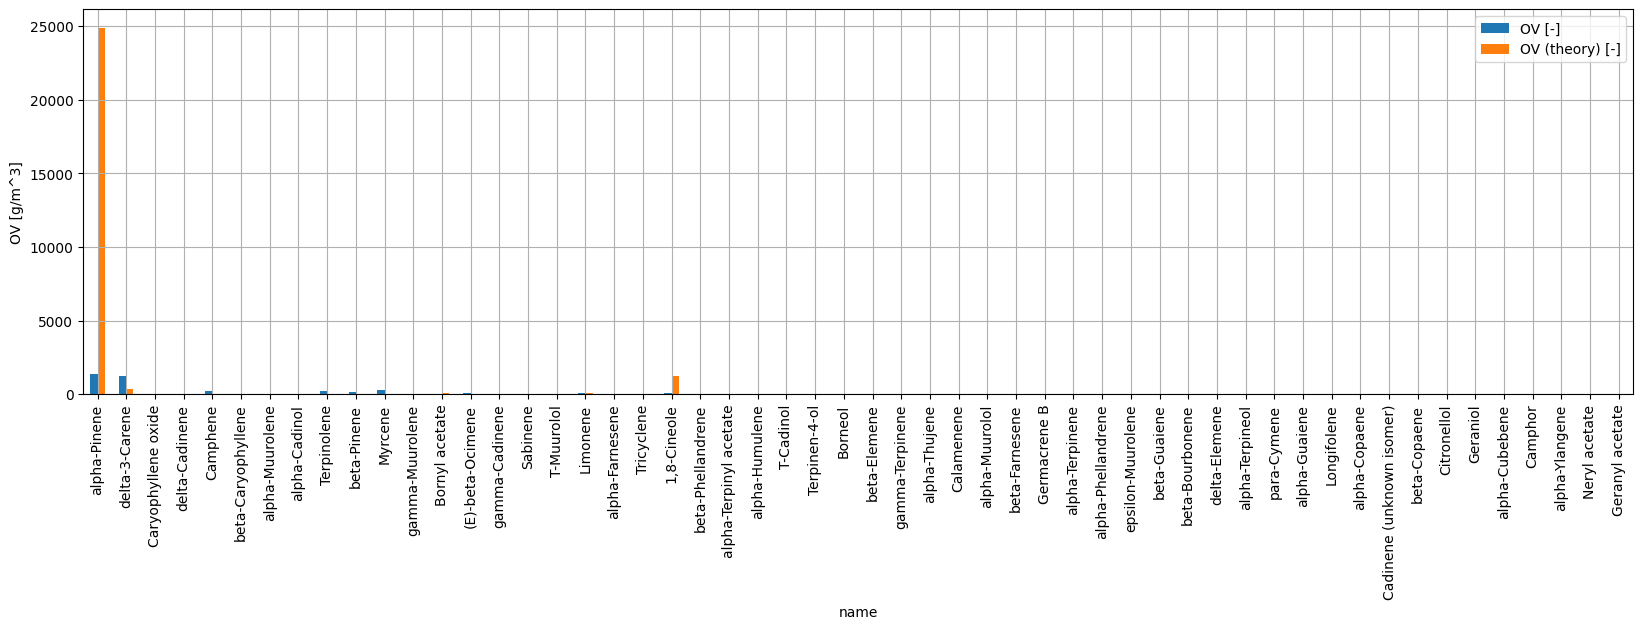

In [51]:
df.plot(x="name", y=["OV [-]", "OV (theory) [-]"], kind="bar", figsize=(20, 5), fontsize=10,legend=True, grid=True, ylabel="OV [g/m^3]") 


<Axes: xlabel='name', ylabel='OV [g/m^3]'>

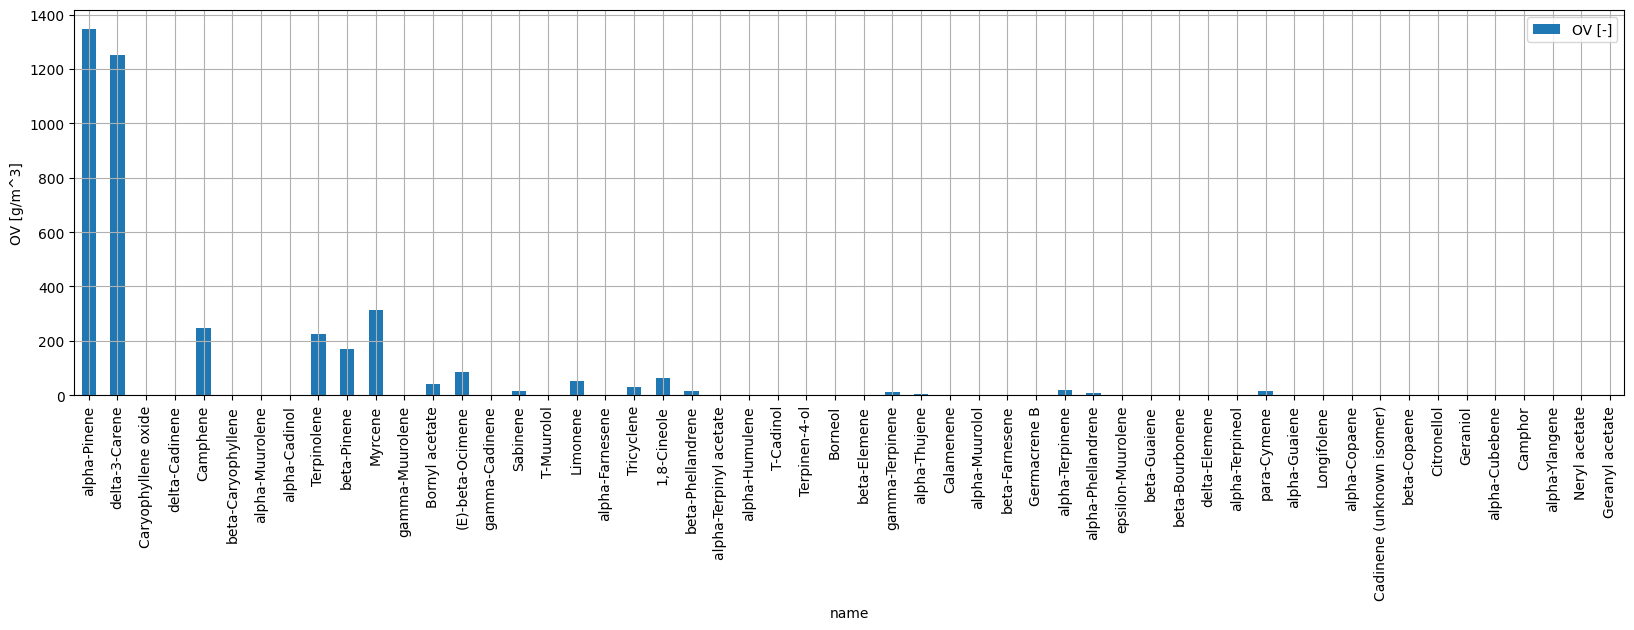

In [52]:
df.plot(x="name", y=["OV [-]"], kind="bar", figsize=(20, 5), fontsize=10,legend=True, grid=True, ylabel="OV [g/m^3]") 

In [53]:
df

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3],Cgi [mg/m^3],OV [-],ODT (theory) [mg/m^3],OV (theory) [-]
0,alpha-Pinene,80-56-8,0.2810,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.071000,...,2.344229e+04,4.071000,136.125201,1.019800,0.2810,5.448859,7346.889389,1348.335352,0.295000,24904.709794
1,delta-3-Carene,13466-78-9,0.2370,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.581000,...,2.344229e+04,4.581000,136.125201,1.019800,0.2370,2.686762,3363.807109,1251.993079,9.300000,361.699689
2,Caryophyllene oxide,1139-30-6,0.0490,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.210000,...,3.715352e+04,2.210000,220.182715,0.921445,0.0490,0.000000,0.000000,NaN,NaN,NaN
3,delta-Cadinene,483-76-1,0.0480,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.048630,...,3.467369e+06,0.048630,204.187801,1.041275,0.0480,0.000000,0.000000,NaN,NaN,NaN
4,Camphene,79-92-5,0.0340,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.275000,...,2.344229e+04,6.275000,136.125201,1.015911,0.0340,3.481921,860.255616,247.063528,NaN,NaN
5,beta-Caryophyllene,87-44-5,0.0290,(−)-β-caryophyllene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.78,https://legacy.chemspider.com/Chemical-Structu...,0.050110,...,6.025596e+06,0.050110,204.187801,1.008468,0.0290,0.000000,0.000000,NaN,NaN,NaN
6,alpha-Muurolene,31983-22-9,0.0280,α-Muurolene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.56,https://legacy.chemspider.com/Chemical-Structu...,0.062760,...,3.630781e+06,0.062760,204.187801,1.028215,0.0280,0.000000,0.000000,NaN,NaN,NaN
7,alpha-Cadinol,481-34-5,0.0270,alpha-cadinol,0.0±1.4 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.95,https://legacy.chemspider.com/Chemical-Structu...,9.130000,...,8.912509e+04,9.130000,222.198365,2.899232,0.0270,0.000000,0.000000,NaN,NaN,NaN
8,Terpinolene,586-62-9,0.0260,TERPINOLENE,1.1±0.2 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.1,4.67,https://legacy.chemspider.com/Chemical-Structu...,3.838000,...,4.677351e+04,3.838000,136.125201,1.028665,0.0260,0.960591,215.503397,224.344482,NaN,NaN
9,beta-Pinene,127-91-3,0.0210,(±)-β-Pinene,2.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,2.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,7.061000,...,2.344229e+04,7.061000,136.125201,1.015911,0.0210,2.215003,375.059542,169.326875,8.900000,42.141522


In [55]:
df.to_csv("intensities.csv", index=False)